<a href="https://colab.research.google.com/github/msaad1311/Spam-Message-Detection/blob/master/Spam_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import spacy
# nlp = spacy.load('en_core_web_lg')

In [0]:
df =pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [0]:
df.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
(df['v1'].value_counts()/len(df))*100

ham     86.593683
spam    13.406317
Name: v1, dtype: float64

In [0]:
df_spam = df[df.v1=='spam']

In [0]:
len(df_spam)

747

In [0]:
df_ham=df[df.v1=='ham']
len(df_ham),df_ham.head()

(4825,     v1                                                 v2
 0  ham  Go until jurong point, crazy.. Available only ...
 1  ham                      Ok lar... Joking wif u oni...
 3  ham  U dun say so early hor... U c already then say...
 4  ham  Nah I don't think he goes to usf, he lives aro...
 6  ham  Even my brother is not like to speak with me. ...)

In [0]:
df_ham=df_ham.sample(frac =0.15481,random_state=42)
len(df_ham)

747

In [0]:
df_com = pd.concat([df_spam,df_ham])

In [0]:
df_com.head()

,v1,v2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [0]:
df_com['v1'].value_counts()

spam    747
ham     747
Name: v1, dtype: int64

In [0]:
df_com.sort_index(axis='index',inplace=True)

In [0]:
df_com.head()

,v1,v2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [0]:
df_com['Label']=df_com['v1'].apply(lambda x: 0 if x=='spam' else 1)

In [0]:
df_com['Label']=df_com.Label.astype('category')

In [0]:
df_com.dtypes

v1         object
v2         object
Label    category
dtype: object

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test = train_test_split(df_com['v2'].values, df_com['v1'].values, test_size=0.20, random_state=42,shuffle=True)

In [0]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1195,), (299,), (1195,), (299,))

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
vector = TfidfVectorizer(stop_words='english')

In [0]:
x_train=vector.fit_transform (x_train)
x_test = vector.transform(x_test)
x_train.shape,x_test.shape

((1195, 3807), (299, 3807))

In [0]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,clf.predict(x_test)))

              precision    recall  f1-score   support

         ham       0.94      0.99      0.97       158
        spam       0.99      0.93      0.96       141

    accuracy                           0.96       299
   macro avg       0.97      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299



In [0]:
df = pd.DataFrame(confusion_matrix(y_test,clf.predict(x_test)), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,157,1
spam,10,131


In [0]:
clf.score(x_test,y_test)

0.9632107023411371

In [0]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
df = pd.DataFrame(confusion_matrix(y_test,dt.predict(x_test)), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,151,7
spam,11,130


In [0]:
dt.score(x_test,y_test)

0.939799331103679

In [0]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
ada = AdaBoostClassifier(n_estimators=1000, random_state=0)
ada.fit(x_train,y_train)
df = pd.DataFrame(confusion_matrix(y_test,ada.predict(x_test)), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,152,6
spam,12,129


In [0]:
ada.score(x_test,y_test)

0.939799331103679

In [0]:
gb = GradientBoostingClassifier(n_estimators=1000)
gb.fit(x_train,y_train)
df = pd.DataFrame(confusion_matrix(y_test,gb.predict(x_test)), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,157,1
spam,14,127


In [0]:
gb.score(x_test,y_test)

0.9498327759197325

# Neural Networks


In [0]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
print(tf.__version__)

2.2.0-rc2


Using TensorFlow backend.


In [0]:
tokenizer=Tokenizer()

In [0]:
df_com.head(10)

,v1,v2,Label
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,0
8,spam,WINNER!! As a valued network customer you have...,0
9,spam,Had your mobile 11 months or more? U R entitle...,0
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",0
12,spam,URGENT! You have won a 1 week FREE membership ...,0
14,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,1
15,spam,"XXXMobileMovieClub: To use your credit, click ...",0
19,spam,England v Macedonia - dont miss the goals/team...,0
20,ham,Is that seriously how you spell his name?,1


In [0]:
x_train,x_test,y_train,y_test = train_test_split(df_com['v2'].values, df_com['Label'].values.astype('float'), test_size=0.20, random_state=42,shuffle=True)

In [0]:
x_token = tokenizer.fit_on_texts(x_train)
sequences_training= tokenizer.texts_to_sequences(x_train)
sequences_testing = tokenizer.texts_to_sequences(x_test)

In [0]:
from toolz.curried import count

def longest(your_list): 
    return max(map(count, your_list))

In [0]:
maxi=longest(sequences_training)
print(maxi)

121


In [0]:
padded_training = pad_sequences(sequences_training,maxlen=maxi,truncating='post',padding='post')
padded_testing = pad_sequences(sequences_testing,maxlen=maxi,truncating='post',padding='post')

In [0]:
num_words = len(tokenizer.word_index)
print(num_words)

4133


In [0]:
import os,random
def clearance():
    keras.backend.clear_session()
    os.environ['PYTHONHASHSEED']='42'
    np.random.seed(42)
    tf.random.set_seed(seed=42)
    np.random.RandomState(42)
    random.seed(42)

In [0]:
clearance()

In [0]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

model1=tf.keras.Sequential()
model1.add(tf.keras.layers.Embedding(num_words+2,64,input_length=maxi))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(30,activation='relu'))
model1.add(tf.keras.layers.Dense(8,activation='relu'))
model1.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 121, 64)           264640    
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 30)                232350    
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 248       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 497,247
Trainable params: 497,247
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=model1.fit(padded_training,y_train,
                   epochs=10,
                   validation_data=(padded_testing,y_test),
                   batch_size=128)

Epoch 1/10
10/10 [==============================] - 0s 25ms/step - loss: 0.6727 - accuracy: 0.6460 - val_loss: 0.6259 - val_accuracy: 0.8194
Epoch 2/10
10/10 [==============================] - 0s 17ms/step - loss: 0.5815 - accuracy: 0.8268 - val_loss: 0.4810 - val_accuracy: 0.8595
Epoch 3/10
10/10 [==============================] - 0s 16ms/step - loss: 0.4283 - accuracy: 0.8477 - val_loss: 0.3124 - val_accuracy: 0.8763
Epoch 4/10
10/10 [==============================] - 0s 16ms/step - loss: 0.3154 - accuracy: 0.8678 - val_loss: 0.2243 - val_accuracy: 0.9030
Epoch 5/10
10/10 [==============================] - 0s 16ms/step - loss: 0.2331 - accuracy: 0.9079 - val_loss: 0.1867 - val_accuracy: 0.9264
Epoch 6/10
10/10 [==============================] - 0s 18ms/step - loss: 0.1627 - accuracy: 0.9490 - val_loss: 0.1485 - val_accuracy: 0.9398
Epoch 7/10
10/10 [==============================] - 0s 16ms/step - loss: 0.1178 - accuracy: 0.9632 - val_loss: 0.1232 - val_accuracy: 0.9565
Epoch 8/10
10

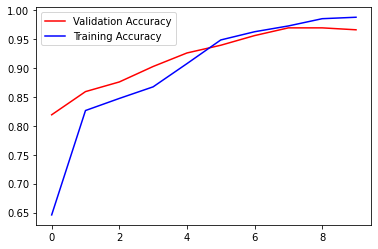

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')
plt.plot(history.history['accuracy'],color='b',label='Training Accuracy')
plt.legend()
plt.show()

In [0]:

model2=tf.keras.Sequential()
model2.add(tf.keras.layers.Embedding(num_words+2,64,input_length=maxi))
model2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)))
model2.add(tf.keras.layers.LSTM(64,return_sequences=True))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(30))
model2.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 121, 64)           264640    
_________________________________________________________________
bidirectional (Bidirectional (None, 121, 128)          66048     
_________________________________________________________________
lstm_1 (LSTM)                (None, 121, 64)           49408     
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 30)                232350    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 612,477
Trainable params: 612,477
Non-trainable params: 0
__________________________________________________

In [0]:
history=model2.fit(padded_training,y_train,
                   epochs=10,
                   validation_data=(padded_testing,y_test),
                   batch_size=128)

Epoch 1/10
10/10 [==============================] - 6s 557ms/step - loss: 0.6172 - accuracy: 0.6879 - val_loss: 0.3579 - val_accuracy: 0.8662
Epoch 2/10
10/10 [==============================] - 4s 449ms/step - loss: 0.3052 - accuracy: 0.8636 - val_loss: 0.1554 - val_accuracy: 0.9264
Epoch 3/10
10/10 [==============================] - 4s 448ms/step - loss: 0.0980 - accuracy: 0.9665 - val_loss: 0.1583 - val_accuracy: 0.9465
Epoch 4/10
10/10 [==============================] - 4s 447ms/step - loss: 0.0286 - accuracy: 0.9891 - val_loss: 0.1590 - val_accuracy: 0.9431
Epoch 5/10
10/10 [==============================] - 4s 441ms/step - loss: 0.0118 - accuracy: 0.9975 - val_loss: 0.1968 - val_accuracy: 0.9666
Epoch 6/10
10/10 [==============================] - 5s 453ms/step - loss: 0.0046 - accuracy: 0.9983 - val_loss: 0.3746 - val_accuracy: 0.9465
Epoch 7/10
10/10 [==============================] - 4s 450ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.1608 - val_accuracy: 0.9565
Epoch 

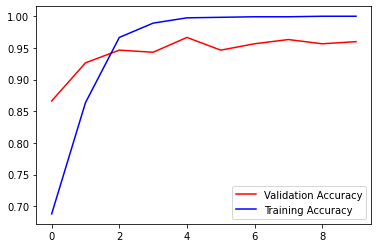

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')
plt.plot(history.history['accuracy'],color='b',label='Training Accuracy')
plt.legend()
plt.show()

In [0]:
clearance()

In [0]:

model3=tf.keras.Sequential()
model3.add(tf.keras.layers.Embedding(num_words+2,300,input_length=maxi))
model3.add(tf.keras.layers.Conv1D(32, 5))
model3.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)))
# model3.add(tf.keras.layers.LSTM(64,return_sequences=True))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dropout(0.2))
model3.add(tf.keras.layers.Dense(30,activation='relu'))
model3.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model3.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 121, 300)          1240500   
_________________________________________________________________
conv1d (Conv1D)              (None, 117, 32)           48032     
_________________________________________________________________
bidirectional (Bidirectional (None, 117, 128)          49664     
_________________________________________________________________
flatten (Flatten)            (None, 14976)             0         
_________________________________________________________________
dropout (Dropout)            (None, 14976)             0         
_________________________________________________________________
dense (Dense)                (None, 30)                449310    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3

In [0]:
history=model3.fit(padded_training,y_train,
                   epochs=10,
                   validation_data=(padded_testing,y_test),
                   batch_size=128)

Epoch 1/10
10/10 [==============================] - 5s 469ms/step - loss: 0.5245 - accuracy: 0.7188 - val_loss: 0.2599 - val_accuracy: 0.8930
Epoch 2/10
10/10 [==============================] - 4s 397ms/step - loss: 0.2481 - accuracy: 0.9063 - val_loss: 0.1244 - val_accuracy: 0.9398
Epoch 3/10
10/10 [==============================] - 4s 404ms/step - loss: 0.0655 - accuracy: 0.9749 - val_loss: 0.1023 - val_accuracy: 0.9666
Epoch 4/10
10/10 [==============================] - 4s 400ms/step - loss: 0.0289 - accuracy: 0.9941 - val_loss: 0.1340 - val_accuracy: 0.9632
Epoch 5/10
10/10 [==============================] - 4s 398ms/step - loss: 0.0164 - accuracy: 0.9967 - val_loss: 0.1461 - val_accuracy: 0.9666
Epoch 6/10
10/10 [==============================] - 4s 403ms/step - loss: 0.0089 - accuracy: 0.9983 - val_loss: 0.1428 - val_accuracy: 0.9666
Epoch 7/10
10/10 [==============================] - 4s 399ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.1561 - val_accuracy: 0.9699
Epoch 

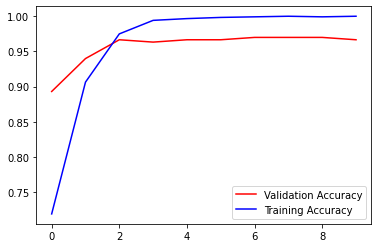

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')
plt.plot(history.history['accuracy'],color='b',label='Training Accuracy')
plt.legend()
plt.show()

In [0]:
random=['Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out!',
        'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.',
        'You have still not claimed the compensation you are due for the accident you had. To start the process please reply YES. To opt out text STOP',
        'Hi my name is Saad. And this is the Ham message',
        'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s'
        ]
for item in random:
    r = tokenizer.texts_to_sequences(item)

    flat_list = []
    for sublist in r:
        for item in sublist:
            flat_list.append(item)

    flat_list = [flat_list]

    r_padded = pad_sequences(flat_list,maxlen=maxi,truncating='post',padding='post')
    prediction_1,prediction_2,prediction_3 = np.round(model1.predict(r_padded)),np.round(model2.predict(r_padded)),np.round(model3.predict(r_padded))
    print(prediction_1,prediction_2,prediction_3)
    print('-----------')

[[0.]] [[0.]] [[1.]]
-----------
[[1.]] [[0.]] [[0.]]
-----------
[[0.]] [[0.]] [[1.]]
-----------
[[1.]] [[1.]] [[1.]]
-----------
[[1.]] [[0.]] [[1.]]
-----------
